#### Machine learning for mental Health

###### The project involves machine learning models that can assist in predicting mental health conditions, analyzing mental health-related data and creating tools that help in diagnosing or monitoring mental health conditions.


### Our main objective is to predict whether a patient should be treated of his/her mental illness or not according to the values obtained in the dataset? 



### Content
This dataset contains the following data:
Timestamp
Age
Gender
Country

state: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition?

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?

phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?

mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments

###### Output Label is = seek_help 

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#### Data Preprocessing

In [2]:
path = 'survey.csv'
data = pd.read_csv(path)

In [3]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
data.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
data.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [7]:
data.drop(['comments','work_interfere', 'state', 'Timestamp'],  axis=1, inplace=True)

In [136]:
data.isna().sum()

Age                           0
Gender                        0
Country                       0
self_employed                18
family_history                0
treatment                     0
no_employees                  0
remote_work                   0
tech_company                  0
benefits                      0
care_options                  0
wellness_program              0
seek_help                     0
anonymity                     0
leave                         0
mental_health_consequence     0
phys_health_consequence       0
coworkers                     0
supervisor                    0
mental_health_interview       0
phys_health_interview         0
mental_vs_physical            0
obs_consequence               0
dtype: int64

In [137]:
# Assuming your DataFrame is called 'Data'
missing_percentages = (data.isna().mean() * 100).round(2)

print(missing_percentages)

Age                          0.00
Gender                       0.00
Country                      0.00
self_employed                1.43
family_history               0.00
treatment                    0.00
no_employees                 0.00
remote_work                  0.00
tech_company                 0.00
benefits                     0.00
care_options                 0.00
wellness_program             0.00
seek_help                    0.00
anonymity                    0.00
leave                        0.00
mental_health_consequence    0.00
phys_health_consequence      0.00
coworkers                    0.00
supervisor                   0.00
mental_health_interview      0.00
phys_health_interview        0.00
mental_vs_physical           0.00
obs_consequence              0.00
dtype: float64


##### Cleaning the NaN values

In [138]:
df_clean = data.dropna()
print(df_clean)

      Age Gender         Country self_employed family_history treatment  \
18     46   male   United States           Yes            Yes        No   
19     36   Male          France           Yes            Yes        No   
20     29   Male   United States            No            Yes       Yes   
21     31   male   United States           Yes             No        No   
22     46   Male   United States            No             No       Yes   
...   ...    ...             ...           ...            ...       ...   
1254   26   male  United Kingdom            No             No       Yes   
1255   32   Male   United States            No            Yes       Yes   
1256   34   male   United States            No            Yes       Yes   
1257   46      f   United States            No             No        No   
1258   25   Male   United States            No            Yes       Yes   

        no_employees remote_work tech_company benefits  ...   anonymity  \
18               1-5    

In [139]:
df_clean.isna().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

Now, our data does not contain any missing values !!

##### Encoding data

In [140]:
# Iterate through each column in the DataFrame
for column in df_clean.columns:
    unique_values = df_clean[column].unique()
    print(f'Column "{column}" has {len(unique_values)} unique values: {unique_values}')

Column "Age" has 53 unique values: [         46          36          29          31          41          33
          35          34          37          32          30          42
          40          27          38          50          24          18
          28          26          22          44          23          19
          25          39          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
Column "Gender" has 49 unique values: ['male' 'Male' 'Female' 'female' 'M' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Ag

In [141]:
# LabelEncoder from scikit-learn
le = LabelEncoder()

1 - Age column

In [142]:
unique_values_age = df_clean['Age'].unique()
print(unique_values_age)

[         46          36          29          31          41          33
          35          34          37          32          30          42
          40          27          38          50          24          18
          28          26          22          44          23          19
          25          39          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]


In [143]:
# Fill with media() values < 18 and > 120
df_clean.loc[df_clean['Age'] < 18, 'Age'] = df_clean['Age'].median()
df_clean.loc[df_clean['Age'] > 120, 'Age'] = df_clean['Age'].median()

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [144]:
df_clean['Age'].unique()

array([46, 36, 29, 31, 41, 33, 35, 34, 37, 32, 30, 42, 40, 27, 38, 50, 24,
       18, 28, 26, 22, 44, 23, 19, 25, 39, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72], dtype=int64)

Now, our age column is encoded and has no invalid values

2 - Gender column

In [151]:
male_str = ['male','m', 'cis male','male leaning androgynous','male-ish', 'maile', 'mal', 'male (cis)', 'male ','guy (-ish) ^_^','make','something kinda male?','man', 'msle', 'mail', 'malr','cis man']
female_str = ['female', 'female ', 'cis female', 'f', 'femake', 'female (cis)','woman', 'femail', 'cis-female/femme', 'female (trans)','trans woman', 'trans-female', 'woman','queer','queer/she/they']

df_clean['Gender'] = df_clean['Gender'].str.lower()
df_clean.loc[df_clean['Gender'].isin(male_str), 'Gender'] = 'male'
df_clean.loc[df_clean['Gender'].isin(female_str), 'Gender'] = 'female'

#Get rid of bullshit
stk_list = ['non-binary','nah','all','enby','fluid','genderqueer','androgyne','agender' ,'neuter','a little about you','p','ostensibly male, unsure what that really means']
df_clean = df_clean[~df_clean['Gender'].isin(stk_list)]
print(df_clean['Gender'].unique())

['male' 'female']


In [152]:
print(df_clean.shape)
print(df.shape)

(1229, 23)
(1236, 23)


In [153]:
df_clean['Gender'] = le.fit_transform(df_clean['Gender'])
df_clean['Gender'].unique()

array([1, 0])

3 - Self employed 

In [199]:
df_clean['self_employed'].unique()

array(['Yes', 'No'], dtype=object)

In [200]:
df_clean['self_employed'] = le.fit_transform(df_clean['self_employed'])
df_clean['self_employed'].unique()

array([1, 0])

4 - family history

In [201]:
df_clean['family_history'].unique()

array(['Yes', 'No'], dtype=object)

In [202]:
df_clean['family_history'] = le.fit_transform(df_clean['family_history'])
df_clean['family_history'].unique()

array([1, 0])

5 - Country 

In [203]:
df_clean['Country'].unique()

array(['United States', 'France', 'United Kingdom', 'Canada', 'Portugal',
       'Netherlands', 'Switzerland', 'Poland', 'Australia', 'Germany',
       'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica', 'Austria',
       'Ireland', 'India', 'South Africa', 'Italy', 'Bulgaria', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand', 'Spain',
       'Finland', 'Uruguay', 'Israel', 'Bosnia and Herzegovina',
       'Hungary', 'Singapore', 'Japan', 'Nigeria', 'Croatia', 'Norway',
       'Thailand', 'Denmark', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

In [204]:
df_clean['Country'] = le.fit_transform(df_clean['Country'])
df_clean['Country'].unique()

array([44, 14, 43,  6, 33, 27, 41, 32,  0, 16, 35, 25,  4, 37,  9,  1, 20,
       19, 38, 22,  5, 40,  8, 24, 34,  2, 28, 39, 13, 45, 21,  3, 18, 36,
       23, 29, 10, 30, 42, 12, 17, 26, 15,  7, 11, 31])

6 - Treatment

In [205]:
df_clean['treatment'].unique()

array(['No', 'Yes'], dtype=object)

In [206]:
df_clean['treatment'] = le.fit_transform(df_clean['treatment'])
df_clean['treatment'].unique()

array([0, 1])

7 - no_employees                  

In [207]:
df_clean['no_employees'].unique()

array(['1-5', '6-25', '100-500', '26-100', 'More than 1000', '500-1000'],
      dtype=object)

In [208]:
# fit and transform the 'no_employees' column
df_clean['no_employees'] = le.fit_transform(df_clean['no_employees'])
df_clean['no_employees'].unique()

array([0, 4, 1, 2, 5, 3])

8 - remote_work                   

In [210]:
df_clean['remote_work'].unique()

array(['Yes', 'No'], dtype=object)

In [211]:
df_clean['remote_work'] = le.fit_transform(df_clean['remote_work'])
df_clean['remote_work'].unique()

array([1, 0])

9 - tech_company                  

In [212]:
df_clean['tech_company'].unique()

array(['Yes', 'No'], dtype=object)

In [213]:
df_clean['tech_company'] = le.fit_transform(df_clean['tech_company'])
df_clean['tech_company'].unique()

array([1, 0])

10 - benefits                      

In [214]:
df_clean['benefits'].unique()

array(['Yes', 'No', "Don't know"], dtype=object)

In [217]:
df_clean['benefits'] = le.fit_transform(df_clean['benefits'])
df_clean['benefits'].unique()

array([2, 1, 0], dtype=int64)

11 - care_options                  

In [218]:
df_clean['care_options'].unique()

array(['Not sure', 'No', 'Yes'], dtype=object)

In [219]:
df_clean['care_options'] = le.fit_transform(df_clean['care_options'])
df_clean['care_options'].unique()

array([1, 0, 2])

12 - wellness_program              


In [220]:
df_clean['wellness_program'].unique()

array(['Yes', 'No', "Don't know"], dtype=object)

In [221]:
df_clean['wellness_program'] = le.fit_transform(df_clean['wellness_program'])

13 - seek_help                     


In [222]:
df_clean['seek_help'].unique()

array(["Don't know", 'No', 'Yes'], dtype=object)

In [223]:
df_clean['seek_help'] = le.fit_transform(df_clean['seek_help'])
df_clean['seek_help'].unique()

array([0, 1, 2])

14 - anonymity                     


In [224]:
df_clean['anonymity'].unique()

array(['Yes', 'No', "Don't know"], dtype=object)

In [225]:
df_clean['anonymity'] = le.fit_transform(df_clean['anonymity'])
df_clean['anonymity'].unique()

array([2, 1, 0])

15 - leave                         


In [226]:
df_clean['leave'].unique()

array(['Very easy', 'Somewhat easy', 'Somewhat difficult', "Don't know",
       'Very difficult'], dtype=object)

In [227]:
df_clean['leave'] = le.fit_transform(df_clean['leave'])
df_clean['leave'].unique()

array([4, 2, 1, 0, 3])

16 - mental_health_consequence     


In [228]:
df_clean['mental_health_consequence'].unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

In [229]:
df_clean['mental_health_consequence'] = le.fit_transform(df_clean['mental_health_consequence'])
df_clean['mental_health_consequence'].unique()

array([1, 0, 2])

17 - phys_health_consequence      

In [230]:
df_clean['phys_health_consequence'].unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

In [231]:
df_clean['phys_health_consequence'] = le.fit_transform(df_clean['phys_health_consequence'])
df_clean['phys_health_consequence'].unique()

array([1, 0, 2])

18 - coworkers                     

In [185]:
df_clean['coworkers'].unique()

array(['Yes', 'Some of them', 'No'], dtype=object)

In [232]:
df_clean['coworkers'] = le.fit_transform(df_clean['coworkers'])
df_clean['coworkers'].unique()

array([2, 1, 0])

19 - supervisor                    


In [233]:
df_clean['supervisor'].unique()

array(['Yes', 'Some of them', 'No'], dtype=object)

In [234]:
df_clean['supervisor'] = le.fit_transform(df_clean['supervisor'])
df_clean['supervisor'].unique()

array([2, 1, 0])

20 - mental_health_interview      


In [235]:
df_clean['mental_health_interview'].unique()

array(['No', 'Maybe', 'Yes'], dtype=object)

In [236]:
df_clean['mental_health_interview'] = le.fit_transform(df_clean['mental_health_interview'])
df_clean['mental_health_interview'].unique()

array([1, 0, 2])

21 - phys_health_interview        

In [237]:
df_clean['phys_health_interview'].unique()

array(['Yes', 'Maybe', 'No'], dtype=object)

In [238]:
df_clean['phys_health_interview'] = le.fit_transform(df_clean['phys_health_interview'])
df_clean['phys_health_interview'].unique()

array([2, 0, 1])

22 - mental_vs_physical            


In [239]:
df_clean['mental_vs_physical'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [240]:
df_clean['mental_vs_physical'] = le.fit_transform(df_clean['mental_vs_physical'])
df_clean['mental_vs_physical'].unique()

array([2, 0, 1])

23 - obs_consequence 

In [241]:
df_clean['obs_consequence'].unique()

array(['Yes', 'No'], dtype=object)

In [242]:
df_clean['obs_consequence'] = le.fit_transform(df_clean['obs_consequence'])
df_clean['obs_consequence'].unique()

array([1, 0])

### Explore and visualize data : exploratory data analysis (EDA)


In [243]:
df_clean.head()

,Age,Gender,Country,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
18,46,1,44,1,1,0,0,1,1,2,...,2,4,1,1,2,2,1,2,2,1
19,36,1,14,1,1,0,4,1,1,1,...,2,2,1,1,1,1,0,0,0,0
20,29,1,44,0,1,1,1,0,1,2,...,1,1,0,1,1,1,1,1,1,0
21,31,1,44,1,0,0,0,1,1,1,...,2,1,1,1,1,1,1,0,2,0
22,46,1,44,0,0,1,2,1,1,2,...,0,0,0,1,1,2,1,0,1,0


In [244]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1229 entries, 18 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Age                        1229 non-null   int64
 1   Gender                     1229 non-null   int32
 2   Country                    1229 non-null   int32
 3   self_employed              1229 non-null   int32
 4   family_history             1229 non-null   int32
 5   treatment                  1229 non-null   int32
 6   no_employees               1229 non-null   int32
 7   remote_work                1229 non-null   int32
 8   tech_company               1229 non-null   int32
 9   benefits                   1229 non-null   int64
 10  care_options               1229 non-null   int32
 11  wellness_program           1229 non-null   int32
 12  seek_help                  1229 non-null   int32
 13  anonymity                  1229 non-null   int32
 14  leave                  

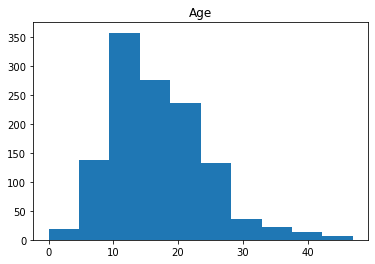

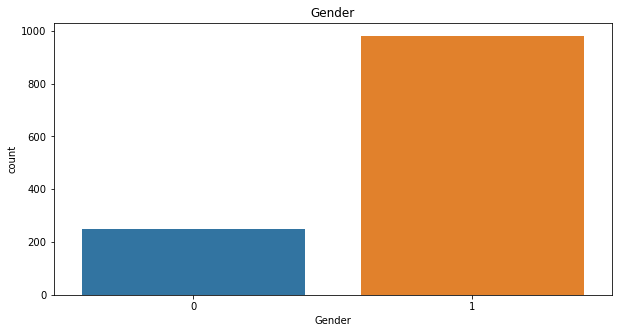

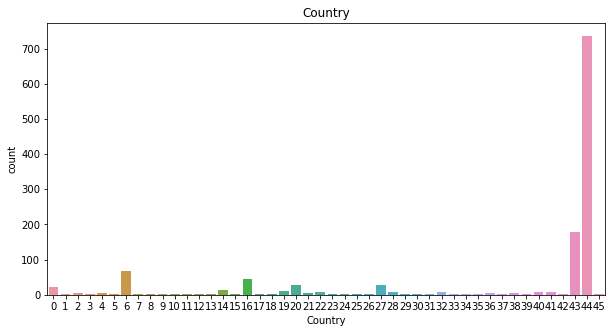

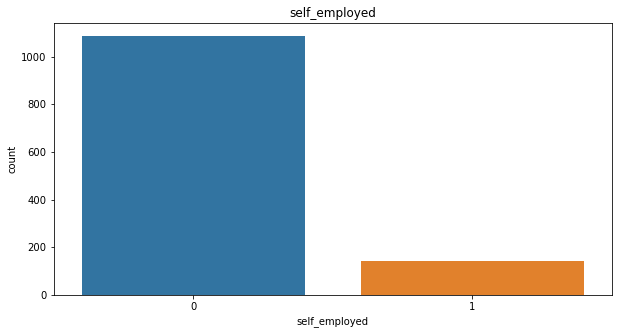

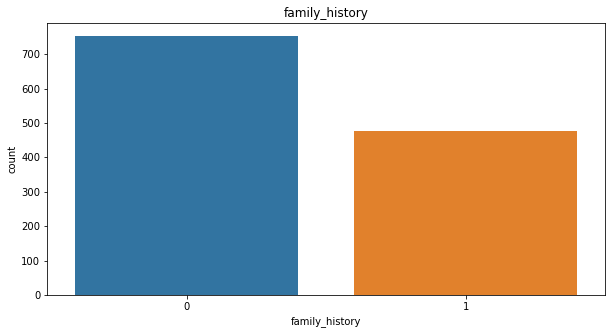

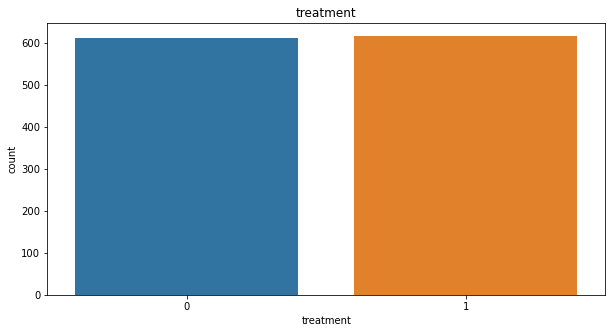

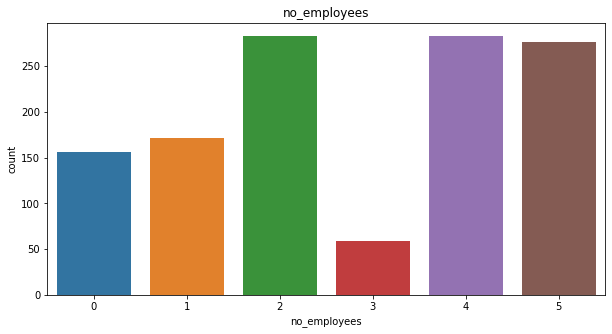

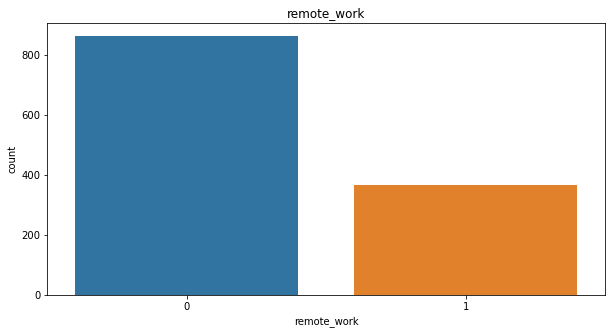

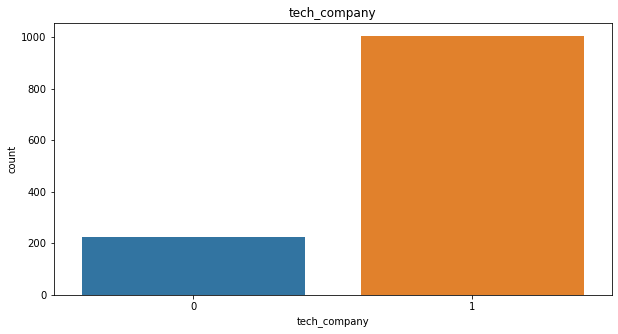

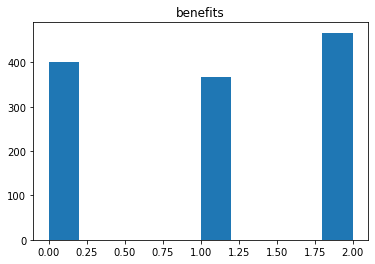

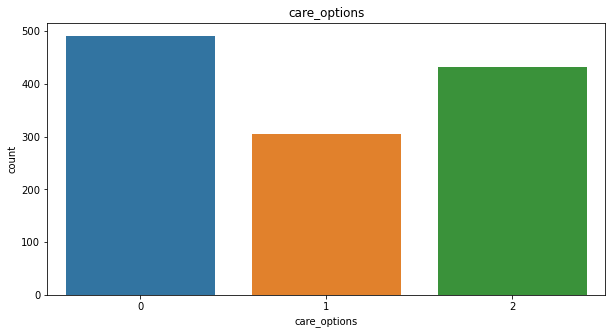

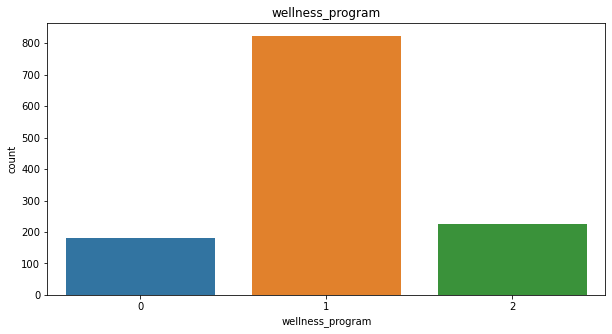

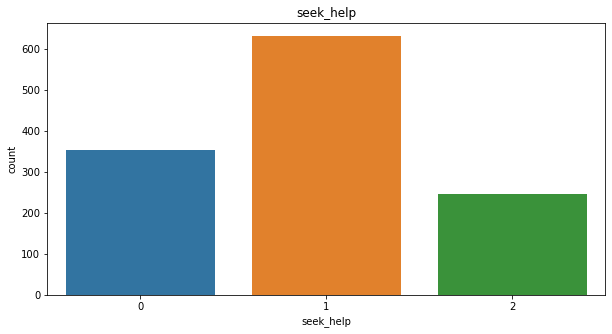

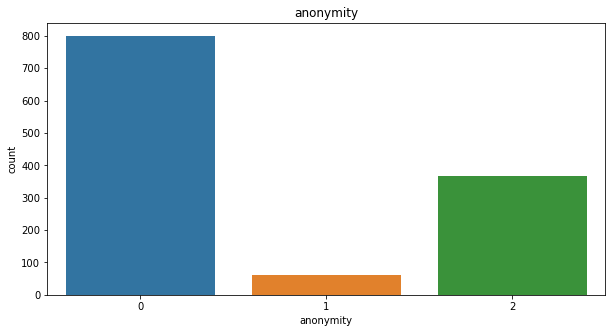

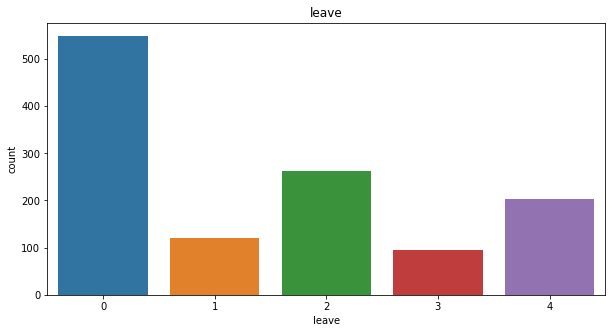

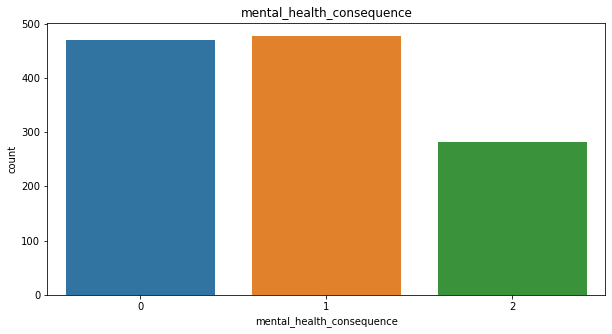

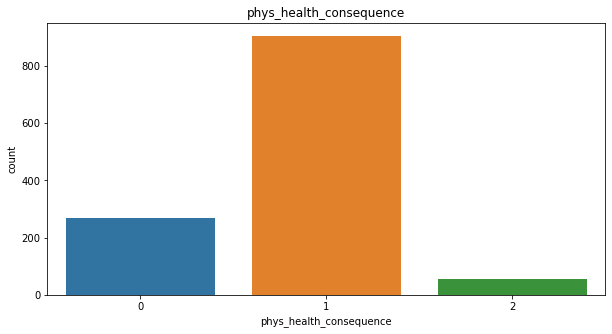

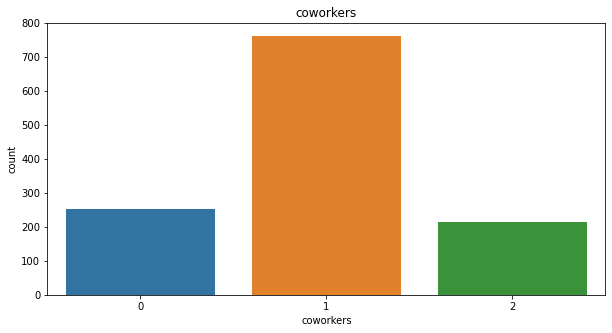

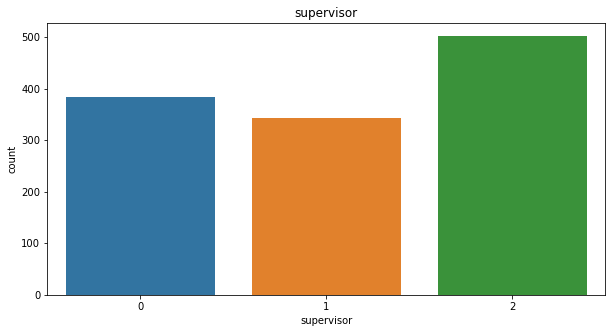

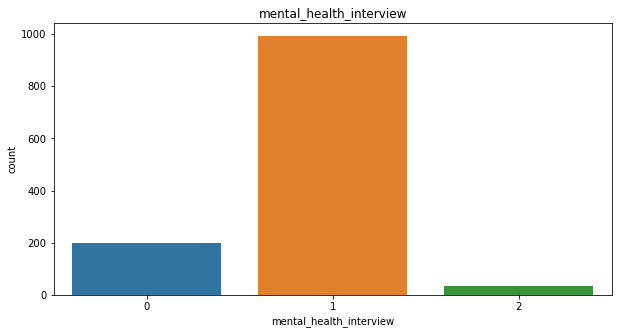

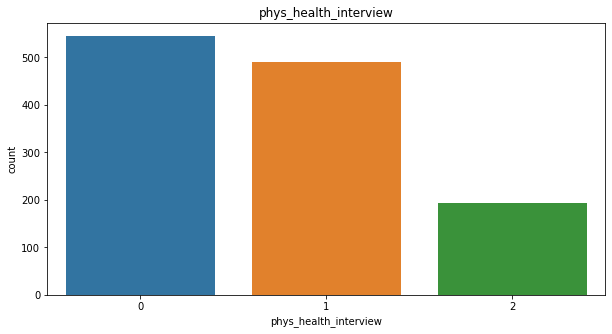

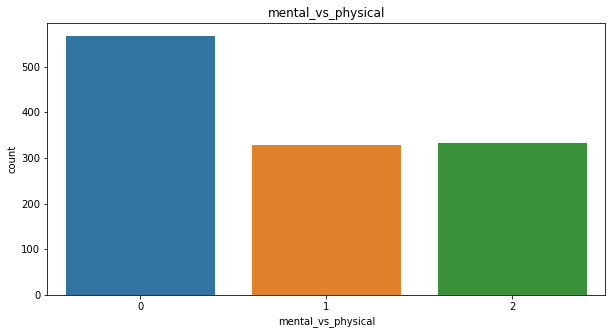

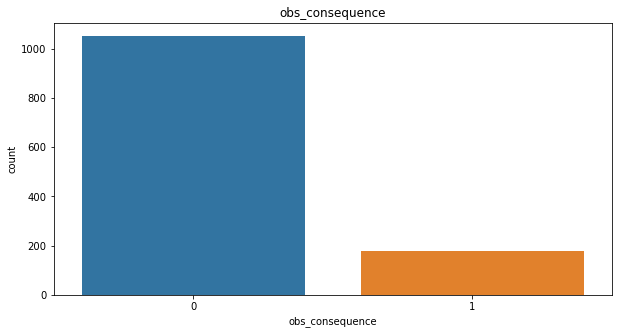

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns

# iterate over each column
for col in df_clean.columns:
    # check if the column is numerical
    if df_clean[col].dtype in ['int64', 'float64']:
        # plot a histogram
        plt.hist(df[col])
        plt.title(col)
        plt.show()
       
    # if the column is categorical
    else:
        # plot a bar chart
        fig = plt.figure(figsize=(10, 5))
        sns.countplot(x=df_clean[col])
        plt.title(col)
        plt.show()


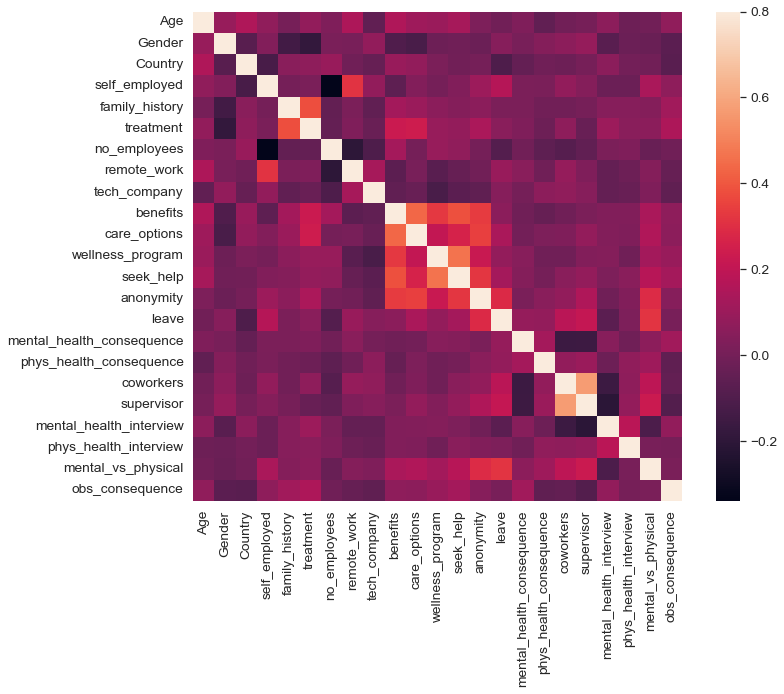

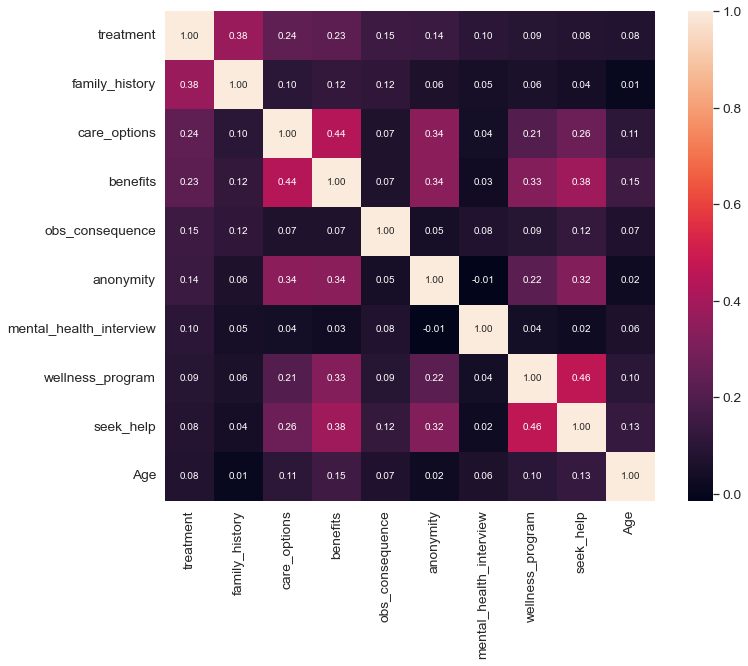

In [264]:
#correlation matrix
corr_matrix = df_clean.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=.8, square=True);
plt.show()

#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corr_matrix.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(df_clean[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Heatmap

#### Scaling and fitting

### Feature Engineering

### Model Selection 

### Model Training and evaluation 

### Model tuning

### Conclusions